## T test

A T-test is a type of inferential statistics which is used to determine if there is a significant difference between the means 
of two groups which may be related in certain features.

T- test has two types:
    * One Sample T-test
    * Two Sample T-test
    * Paired T-test

###  One-sample T-test with Python

The test will tell us whether means of the sample and the population are different.

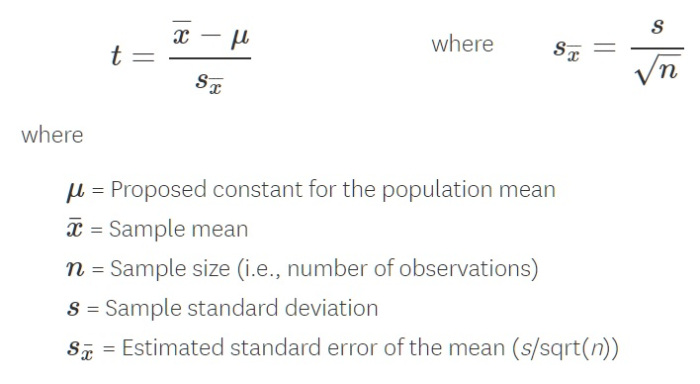

In [1]:
from IPython.display import Image
Image(filename="t-test.jpg")

In [2]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [3]:
len(ages)          #Total number of students wrt their ages.

32

In [4]:
import numpy as np
ages_mean = np.mean(ages)
print(ages_mean)

30.34375


Now we want is there a statistical difference between the mean of population and sample. Can be done with the help of one sample 
T-test.

In [5]:
## Lets take sample

Sample_size=10
age_sample=np.random.choice(ages,Sample_size)

In [6]:
age_sample

array([70, 18, 24, 35, 25, 20, 65, 26, 28, 18])

In [7]:
from scipy.stats import ttest_1samp
# Here library (scipy.stats) with (ttest_1amp) function, used for One sample Testing which results in two values ttest & p_value.

In [8]:
ttest,p_value=ttest_1samp(age_sample,30)
#pop-mean: expected value in population mean

In [9]:
print(p_value)

0.6401402765256956


In [10]:
print(ttest)

0.48371418424258167


In [11]:
# H0: There is no difference.
# H1: There is difference.
if p_value < 0.05:            # alpha value is 0.05 or 5%
    print('we are rejecting null hypothesis')
else:
    print('we are accepting null hypothesis')

we are accepting null hypothesis


### Some more examples
Consider a age of a student in a colleage and in class A

In [12]:
import numpy as np
import scipy.stats as stats
import math
np.random.seed(6)
school_Ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_Ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [13]:
classA_Ages.mean()

46.9

In [14]:
_,p_value=stats.ttest_1samp(a=classA_Ages,popmean=school_Ages.mean())

In [15]:
school_Ages.mean()

53.303333333333335

In [16]:
print(p_value)                 # Significance value

1.139027071016194e-13


In [17]:
if p_value < 0.05:            # alpha value is 0.05 or 5%
    print('we are rejecting null hypothesis')            # There is no difference in the mean of the age.
else:
    print('we are accepting null hypothesis')            # There is definately a difference in the mean of ages(class vs school)

we are rejecting null hypothesis


### Two-sample T-test With Python

The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether 
there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test 
is a parametric test. This test is also known as: Independent t Test.

In [18]:
np.random.seed(12)
classB_Ages=stats.poisson.rvs(loc=18,mu=30,size=1500)
classB_Ages.mean()

47.858

In [19]:
_,p_value=stats.ttest_ind(a=classA_Ages,b=classB_Ages,equal_var=False)
#If True (default), perform a standard independent 2 sample test
#that assumes equal population variances [1]_.
#If False, perform Welch's t-test, which does not assume equal
#population variance [2]_.

In [20]:
print(p_value)

0.16425918810792187


In [21]:
if p_value < 0.05:            # alpha value is 0.05 or 5%
    print('we are rejecting null hypothesis')            # There is no difference in the mean of the ages(ClassA vs ClassB)
else:
    print('we are accepting null hypothesis')            # There is definately a difference in the mean of ages(ClassA vs ClassB)

we are accepting null hypothesis


### Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test.

In [22]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

#The location (``loc``) keyword specifies the mean.
#The scale (``scale``) keyword specifies the standard deviation.

In [23]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[29.78770883 26.70425307 23.75495078 37.0592855  21.64539021 34.38784426
 23.36295242 25.22451908 28.47169676 21.41973927 27.56523674 26.00007653
 25.90425609 24.13389379 46.9233251 ]


In [24]:
import pandas as pd
weight_df = pd.DataFrame({"weight_10":np.array(weight1),
                          "weight_20":np.array(weight2),
                          "weight_change":np.array(weight2)-np.array(weight1)})

In [25]:
weight_df

,weight_10,weight_20,weight_change
0,25,29.787709,4.787709
1,30,26.704253,-3.295747
2,28,23.754951,-4.245049
3,35,37.059285,2.059285
4,28,21.645390,-6.354610
5,34,34.387844,0.387844
6,26,23.362952,-2.637048
7,29,25.224519,-3.775481
8,30,28.471697,-1.528303
9,26,21.419739,-4.580261


In [26]:
_,p_value_rel=stats.ttest_rel(a=weight1,b=weight2)

In [27]:
p_value_rel

0.019551757376491532

In [28]:
if p_value_rel < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


Here it means there is statistical difference in the weight1 and weight2.

## Correlation

In [29]:
import seaborn as sns
iris_df = sns.load_dataset('iris')

In [30]:
iris_df.shape

(150, 5)

In [31]:
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


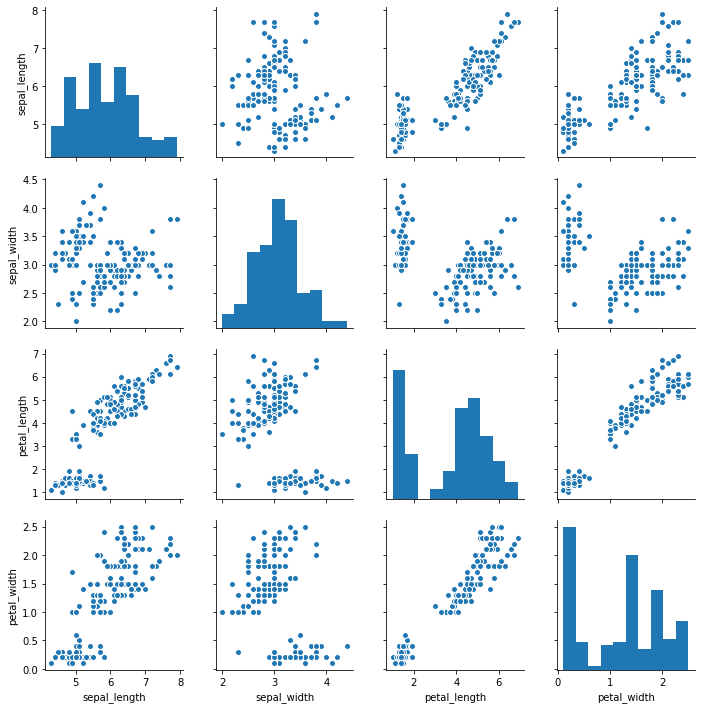

In [32]:
sns.pairplot(iris_df)

## Chi-Square Test

The test is applied when you have two categorical variables from a single population. It is used to determine whether there 
is a significant association between the two variables.

In [33]:
dataset=sns.load_dataset('tips')

In [34]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
dataset_table = pd.crosstab(dataset['sex'],dataset['smoker'])  #crosstab in-built function to form matrix(passing two cate.para.)
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [36]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [37]:
val = stats.chi2_contingency(dataset_table)
val                                              

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [38]:
Expected_Values = val[3]                               # These are expected values
Expected_Values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [39]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha=0.05

Degree of Freedom:- 1


#### Chi square formula
X^2 = submission (o-e)^2 / e

In [40]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2/e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]          # for two rows

In [41]:
chi_square

array([0.00119737, 0.00073745])

In [42]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [43]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)  # Percent point function (inverse of `cdf`) at q of the given.
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [44]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1


In [45]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to 
compare the means of each level or group the variable.

### One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check 
whether all 3 group are similar or not 

In [46]:
import seaborn as sns
df1=sns.load_dataset('iris')

In [47]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
df_anova = df1[['petal_width','species']]

In [49]:
grps = pd.unique(df_anova.species.values)

In [50]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}

In [52]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [53]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [54]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
